# **NMR chemical shift data as rich nuclear environment features**
Towards continuous atom typing

This allows us to do something quite powerful: predict any of the heads given the other information. Specifically of interest to enzyme design,
- Given an arbitrary point cloud with bond connections, pH, and Temperature, give the **chemical shift (deshielding) of each individual nucleus**


### Imports

In [1]:
import numpy as np
import pynmrstar

### Example

In [11]:
entry = pynmrstar.Entry.from_file(
    "/home/northja/projects/chem_phys/deepNMR/database/bmrb_entries_protein/bmr3/bmr3_3.str",
    convert_data_types=True
)

In [33]:
cs_result_sets = []
tags = ['Comp_index_ID', 'Comp_ID', 'Atom_ID', 'Atom_type', 'Val', 'Val_err']
for chemical_shift_loop in entry.get_loops_by_category("Atom_chem_shift"):
    cs_result_sets.append(chemical_shift_loop.get_tag(tags))
#cs_result_sets

In [34]:
chem_shifts = np.array(cs_result_sets[0])

In [35]:
chem_shifts[0]

array([1, 'SER', 'HA', 'H', Decimal('4.44'), Decimal('0.01')],
      dtype=object)

In [18]:
condn = []
tags = ['Type', 'Val']
for condition in entry.get_loops_by_category("Sample_condition_variable"):
    condn.append(condition.get_tag(tags))

In [19]:
condn

[[['pH', '6.1'], ['temperature', '303']]]

### Module definitions

In [2]:
import os

def search_files(directory='.', extension=''):
    filelist = []

    extension = extension.lower()
    for dirpath, dirnames, files in os.walk(directory):
        for name in files:
            if extension and name.lower().endswith(extension):
                filelist.append(os.path.join(dirpath, name))
            elif not extension:
                #print(os.path.join(dirpath, name))
                continue
    return filelist

In [3]:
files = search_files(
    directory="/home/northja/projects/chem_phys/deepNMR/database/bmrb_entries_protein/",
    extension=".str"
)
#files

['/home/northja/projects/chem_phys/deepNMR/database/bmrb_entries_protein/bmr19546/bmr19546_3.str',
 '/home/northja/projects/chem_phys/deepNMR/database/bmrb_entries_protein/bmr30343/bmr30343_3.str',
 '/home/northja/projects/chem_phys/deepNMR/database/bmrb_entries_protein/bmr15367/bmr15367_3.str',
 '/home/northja/projects/chem_phys/deepNMR/database/bmrb_entries_protein/bmr17453/bmr17453_3.str',
 '/home/northja/projects/chem_phys/deepNMR/database/bmrb_entries_protein/bmr17809/bmr17809_3.str',
 '/home/northja/projects/chem_phys/deepNMR/database/bmrb_entries_protein/bmr4053/bmr4053_3.str',
 '/home/northja/projects/chem_phys/deepNMR/database/bmrb_entries_protein/bmr11155/bmr11155_3.str',
 '/home/northja/projects/chem_phys/deepNMR/database/bmrb_entries_protein/bmr6710/bmr6710_3.str',
 '/home/northja/projects/chem_phys/deepNMR/database/bmrb_entries_protein/bmr15284/bmr15284_3.str',
 '/home/northja/projects/chem_phys/deepNMR/database/bmrb_entries_protein/bmr4024/bmr4024_3.str',
 '/home/northja/

In [4]:
len(files)

14449

In [5]:
from tqdm import tqdm

In [70]:
pdb_ids = []
chemical_shift_tensors = []
temperatures = []
pHs = []

pdb_id = None

for file in tqdm(files):
    # Setup the entry
    entry = pynmrstar.Entry.from_file(
        file,
        convert_data_types=True
    )

    pdb_id = None

    # Get accession code
    tags = ["Accession_code"]

    pdb_id = [db_loop.get_tag(tags) for db_loop in entry.get_loops_by_category("Assembly_db_link")]
    
    #print(len(pdb_id))
    #assert len(pdb_id) == 1 or 0 # should be a single entry in there
    pdb_ids.append(pdb_id)

    # if the last accession code exists, (just added a PDB code):
    if len(pdb_id) == 1 :
        # Get the next chemical shift tensor
        tags = ['Comp_index_ID', 'Comp_ID', 'Atom_ID', 'Atom_type', 'Val', 'Val_err']        
        cs_result_sets = [chemical_shift_loop.get_tag(tags) for chemical_shift_loop in entry.get_loops_by_category("Atom_chem_shift")]
        
        chem_shifts = np.array(cs_result_sets)
        chemical_shift_tensors.append(chem_shifts)


  0%|          | 26/14449 [00:04<24:10,  9.94it/s] /tmp/ipykernel_2019/2744761542.py:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  chem_shifts = np.array(cs_result_sets)
  1%|▏         | 184/14449 [00:35<36:34,  6.50it/s]Couldn't convert tag data type because it is not in the dictionary: _Experiment.Details
Couldn't convert tag data type because it is not in the dictionary: _Peak.Type
  1%|▏         | 191/14449 [00:36<32:59,  7.20it/s]Couldn't convert tag data type because it is not in the dictionary: _Experiment.Details
Couldn't convert tag data type because it is not in the dictionary: _Peak.Type
Couldn't convert tag data type because it is not in the dictionary: _Peak.Type
  1%|▏         | 201/14449 [00:38<28:09,  8.43it/s]  Couldn't convert tag data type becau

### Dataset curation and saving

In [6]:
import pickle

In [75]:
file = open("pdb_ids.pkl", 'wb')
pickle.dump(pdb_ids, file)

file = open("cs_tensors.pkl", 'wb')
pickle.dump(chemical_shift_tensors, file)

In [10]:
file = open("cs_tensors.pkl", 'rb')
chemical_shift_tensors = pickle.load(file)

EOFError: Ran out of input

In [8]:
tensors = [t.squeeze() for t in chemical_shift_tensors]

num_nuclei = 0
for model in tensors:
    num_nuclei = num_nuclei + len(model)
print(num_nuclei)

NameError: name 'chemical_shift_tensors' is not defined

In [90]:
file = open("cs_tensors.pkl", 'wb')
pickle.dump(tensors, file)

In [20]:
file = open("pdb_ids.pkl", 'rb')
pdb_ids = pickle.load(file)

In [21]:
l = [p[0] for p in pdb_ids if p]
len(l)

2857

In [23]:
import matplotlib.pyplot as plt

In [26]:
lens = [len(i) for i in l]

(array([2.854e+03, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1. , 10.7, 20.4, 30.1, 39.8, 49.5, 59.2, 68.9, 78.6, 88.3, 98. ]),
 <BarContainer object of 10 artists>)

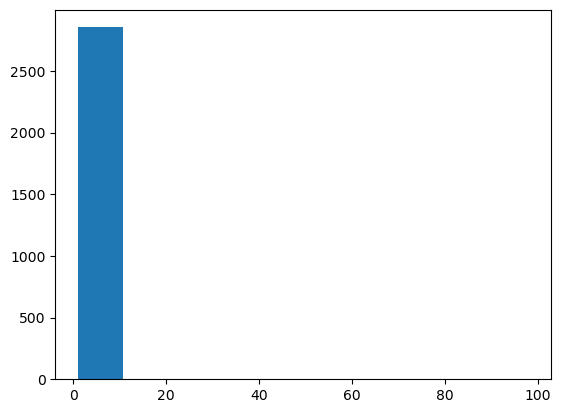

In [27]:
plt.hist(lens)